<a href="https://colab.research.google.com/github/GabrielButti/Challenge-Telecom-X/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
response.raise_for_status()

data = response.json()

In [56]:
df = pd.read_json(url)
df = pd.json_normalize(df.to_dict(orient="records"))
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [57]:
df.isna().sum().sort_values(ascending=False)


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [60]:
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30
df['Contas_Diarias']

,Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [61]:
binary_cols = [
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

binary_map = {
    'yes': 1,
    'no': 0
}

for col in binary_cols:
    df[col] = df[col].map(binary_map)


In [62]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
       'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies',
       'account.PaperlessBilling', 'account.Charges.Monthly',
       'Contas_Diarias'],
      dtype='object')

In [63]:
df['account.Charges.Monthly'].describe()

,account.Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [64]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


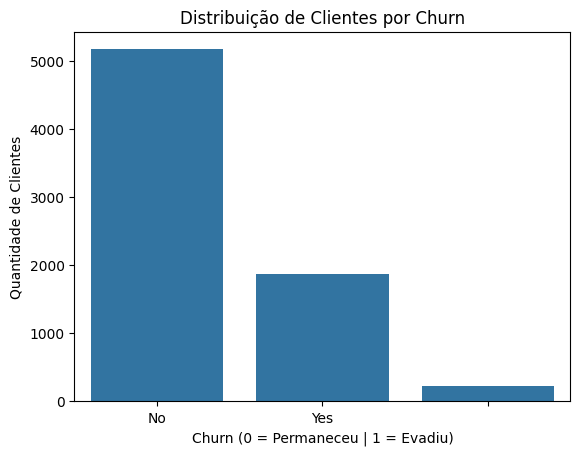

In [65]:
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn (0 = Permaneceu | 1 = Evadiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()


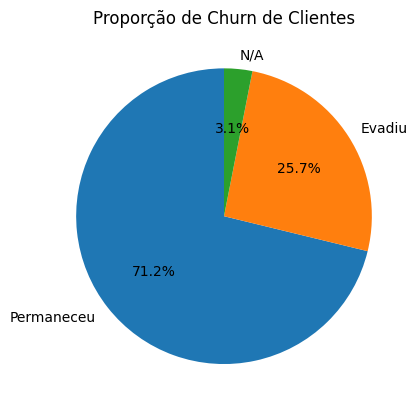

In [66]:
churn_counts = df['Churn'].value_counts()

plt.pie(
    churn_counts,
    labels=['Permaneceu', 'Evadiu', 'N/A'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Proporção de Churn de Clientes')
plt.show()


In [67]:
df_churn = df[df['Churn'] == 1]
df_no_churn = df[df['Churn'] == 0]

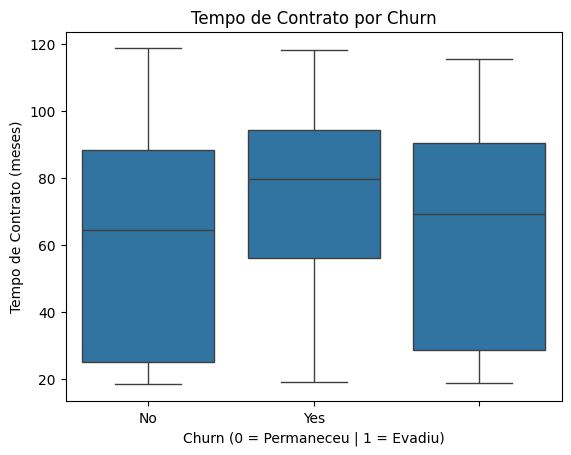

In [68]:
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df)
plt.title('Tempo de Contrato por Churn')
plt.xlabel('Churn (0 = Permaneceu | 1 = Evadiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()


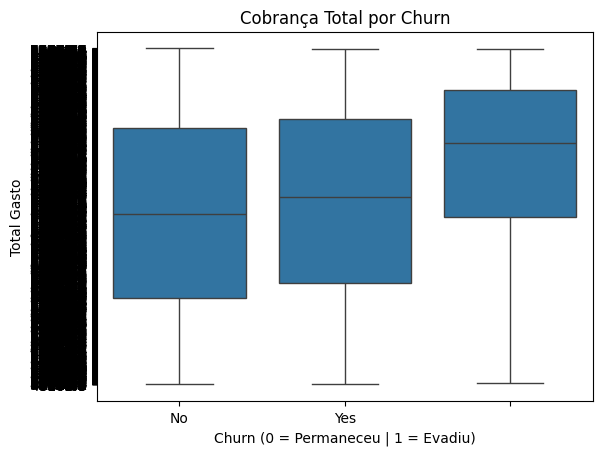

In [69]:
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Cobrança Total por Churn')
plt.xlabel('Churn (0 = Permaneceu | 1 = Evadiu)')
plt.ylabel('Total Gasto')
plt.show()


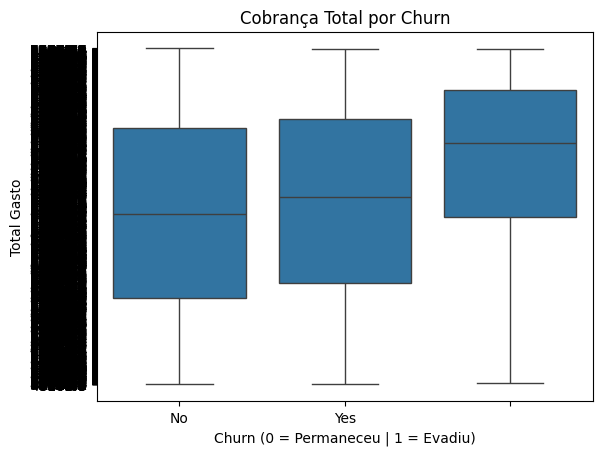

In [70]:
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Cobrança Total por Churn')
plt.xlabel('Churn (0 = Permaneceu | 1 = Evadiu)')
plt.ylabel('Total Gasto')
plt.show()


In [73]:
def churn_por_categoria(coluna, titulo):
    sns.barplot(
        x=coluna,
        y='Churn',
        data=df,
        estimator=lambda x: sum(x)/len(x)
    )
    plt.title(titulo)
    plt.ylabel('Taxa de Churn')
    plt.xlabel(coluna)
    plt.xticks(rotation=45)
    plt.show()


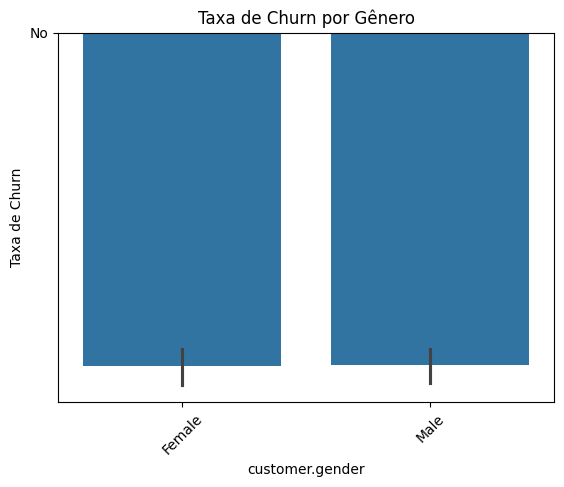

In [75]:
churn_por_categoria('customer.gender', 'Taxa de Churn por Gênero')

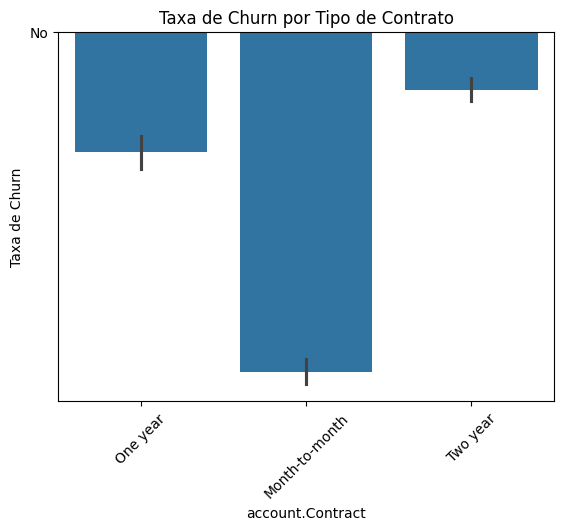

In [77]:
churn_por_categoria('account.Contract', 'Taxa de Churn por Tipo de Contrato')

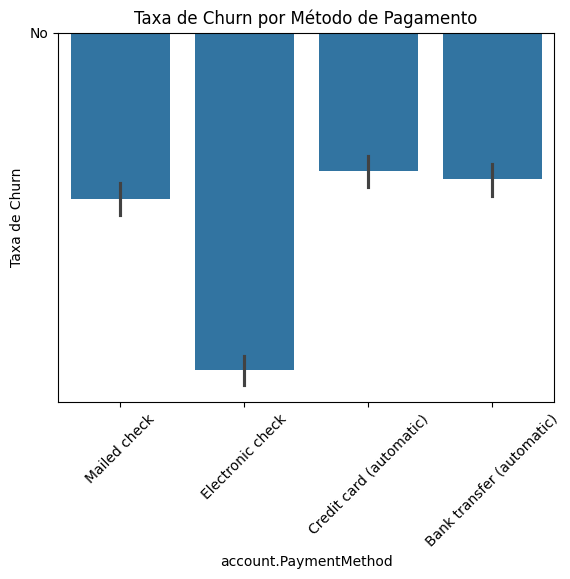

In [78]:
churn_por_categoria('account.PaymentMethod', 'Taxa de Churn por Método de Pagamento')

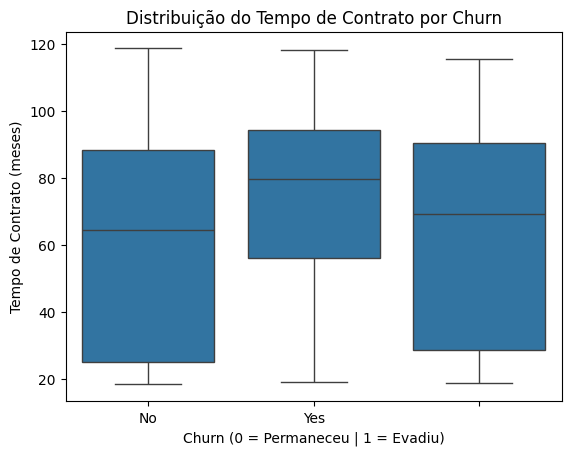

In [81]:
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df)
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Churn (0 = Permaneceu | 1 = Evadiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()